### Section 1: Business Understanding

In this notebook I will be answering 3 question with the airbnb data.

1. What is the price difference between Boston and Seattle?

2. What is the square footage difference between Boston and Seattle?

3. What is the difference in percentage of units available for monthly rental in each city?

#### Import Libraries

In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd

### Section 2: Data Understanding

#### Gather the data

In [4]:
bostonCal = pd.read_csv('Boston Data/calendar.csv')

In [5]:
bostonList = pd.read_csv('Boston Data/listings.csv')

In [6]:
bostonRev = pd.read_csv('Boston Data/reviews.csv')

In [7]:
bostonCal.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [8]:
bostonList.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [11]:
seattleCal = pd.read_csv('Seattle Data/calendar.csv')

In [12]:
seattleList = pd.read_csv('Seattle Data/listings.csv')

In [13]:
seattleRev = pd.read_csv('Seattle Data/reviews.csv')

### Explore the data

In [109]:
seattleList.shape

(86, 92)

In [114]:
bostonList.shape

(51, 96)

In [15]:
seattleList.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [16]:
seattleList.columns


Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [115]:
bostonList.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

### Clean the data

Function for data cleaning

In [17]:

def priceToNum(series):
    '''
    converts a column of numeric strings to a column of floats
    input: series of strings
    output: series of floats
    
    '''
     series = series.str.replace('$', '', regex = True)
     series = series.replace(',', '', regex = True)
     series = series.astype(float)
     return series
     
    

#### Analysis of Airbnb prices

In [19]:
seattleList['price']

0        $85.00
1       $150.00
2       $975.00
3       $100.00
4       $450.00
         ...   
3813    $359.00
3814     $79.00
3815     $93.00
3816     $99.00
3817     $87.00
Name: price, Length: 3818, dtype: object

In [101]:
bostonList.shape

(51, 96)

In [102]:
seattleList.shape

(86, 92)

Clean price data

In [20]:
bostonList['price'] = priceToNum(bostonList['price'])

In [21]:
seattleList['price'] = priceToNum(seattleList['price'])

Remove rows with missing price data

In [84]:
bostonList = bostonList.dropna(subset=['price'])

In [85]:
seattleList = seattleList.dropna(subset=['price'])

In [25]:
bostonList['price'].mean()

173.9258019525802

In [83]:
bostonList['price'].median()

150.0

In [27]:
seattleList['price'].mean()

127.97616553169199

In [116]:
seattleList['price'].median()

119.5

Remove outliers from boston data for visualization

In [81]:
bostonListHist =bostonList[(bostonList['price'] < 1000) ]

Boston price statistics

In [76]:
bostonList['price'].describe()

count    3583.000000
mean      172.069216
std       125.277945
min        10.000000
25%        85.000000
50%       150.000000
75%       220.000000
max      1400.000000
Name: price, dtype: float64

Seattle price statistics

In [32]:
seattleList['price'].describe()

count    3818.000000
mean      127.976166
std        90.250022
min        20.000000
25%        75.000000
50%       100.000000
75%       150.000000
max      1000.000000
Name: price, dtype: float64

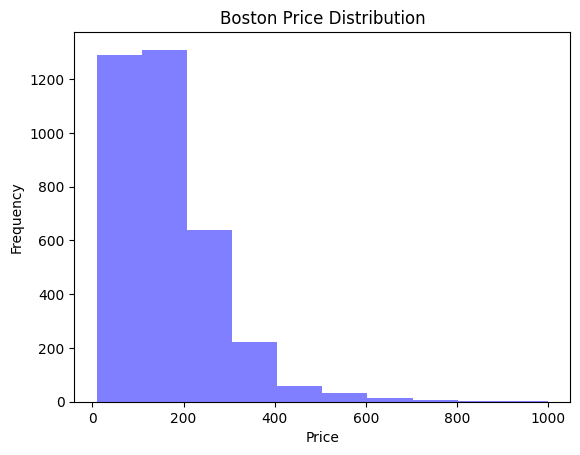

In [82]:

import matplotlib.pyplot as plt
import numpy as np

# generate some random price data


# create a histogram of the price data
plt.hist(bostonListHist['price'], bins=10, color='blue', alpha=0.5)

# add labels and title
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Boston Price Distribution')

# display the histogram
plt.show()

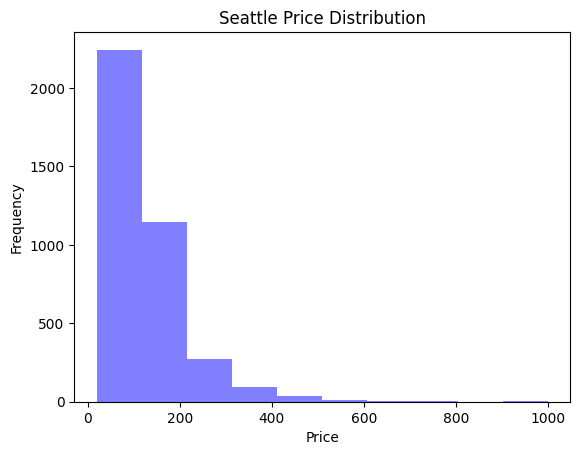

In [79]:


# create a histogram of the price data
plt.hist(seattleList['price'], bins=10, color='blue', alpha=0.5)

# add labels and title
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Seattle Price Distribution')

# display the histogram
plt.show()

#### Square Feet comparison

In [90]:
bostonList =bostonList[(bostonList['square_feet'] > 25)]

In [33]:
seattleList['square_feet'].mean()

854.6185567010309

In [91]:
seattleList = seattleList[(seattleList['square_feet'] > 25)]

#### Seattle square footage statistics

In [92]:
seattleList['square_feet'].describe()

count      86.000000
mean      963.813953
std       634.617560
min       120.000000
25%       512.500000
50%       800.000000
75%      1200.000000
max      3000.000000
Name: square_feet, dtype: float64

In [93]:
bostonList['square_feet'].mean()

942.3529411764706

#### Boston square footage statistics

In [94]:
bostonList['square_feet'].describe()

count      51.000000
mean      942.352941
std       572.192584
min        90.000000
25%       540.000000
50%       875.000000
75%      1200.000000
max      2400.000000
Name: square_feet, dtype: float64

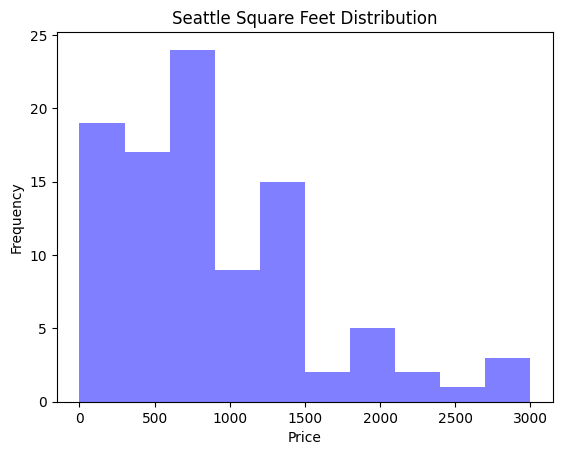

In [88]:

# create a histogram of the price data
plt.hist(seattleList['square_feet'], bins=10, color='blue', alpha=0.5)

# add labels and title
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Seattle Square Feet Distribution')

# display the histogram
plt.show()

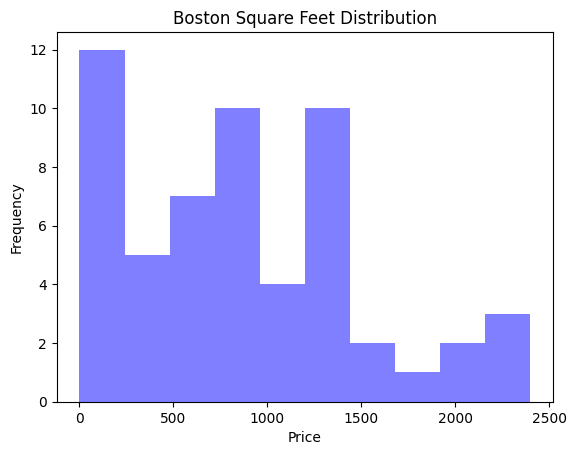

In [89]:

# create a histogram of the price data
plt.hist(bostonList['square_feet'], bins=10, color='blue', alpha=0.5)

# add labels and title
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Boston Square Feet Distribution')

# display the histogram
plt.show()

#### Availability of monthly rental comparison

clean monthly price data

In [67]:
bostonList['monthly_price'] = priceToNum( bostonList['monthly_price'])

In [68]:
seattleList['monthly_price'] = priceToNum(seattleList['monthly_price'])

In [69]:
bostonList['monthly_price'].mean()

3692.097972972973

In [70]:
seattleList['monthly_price'].mean() 

2613.336189848385

In [95]:
bostonList['monthly_price'].isnull().sum()

14

In [96]:
bostonList['price'].isnull().sum()

0

In [97]:
bostonList['price'].shape

(51,)

#### Percentage of boston units available for monthly rental

In [104]:
(51-14)/51

0.7254901960784313

In [105]:
seattleList['price'].isnull().sum()

0

In [106]:
seattleList['monthly_price'].isnull().sum()

41

In [107]:
seattleList.shape

(86, 92)

#### Percentage of boston units available for monthly rental

In [108]:
(86-41)/86

0.5232558139534884

52.3 % of units are available for monthly rental in seattle while, 72.5% are available for monthly rental in Boston.